Text(0.5, 1.0, 'Y = 2, virginica')

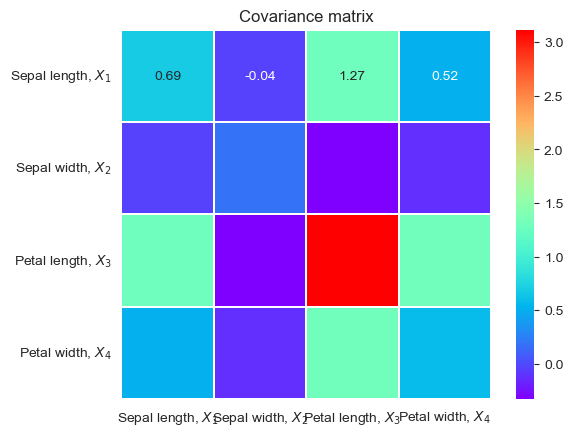

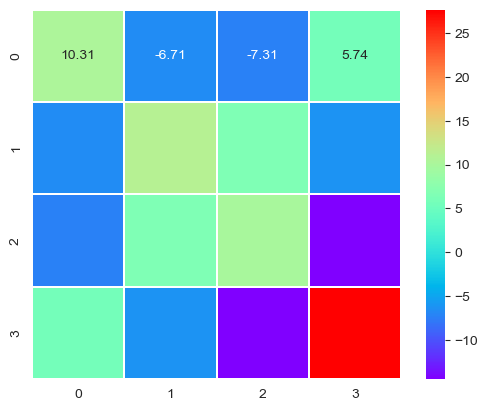

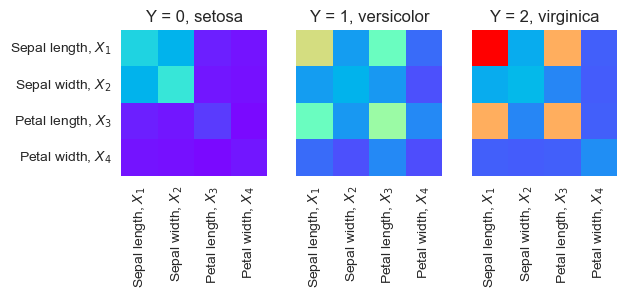

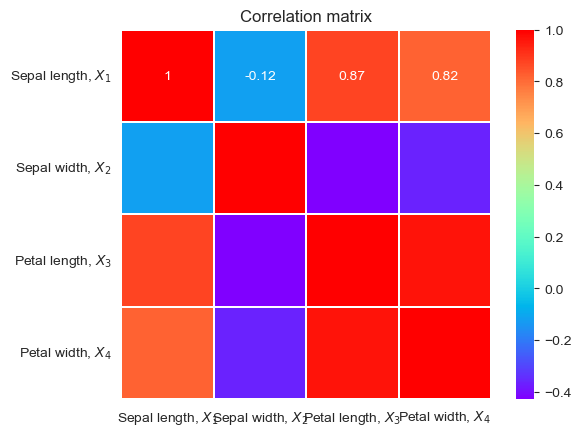

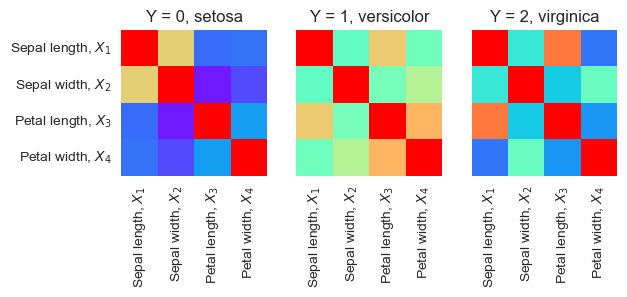

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris data
# iris_sns = sns.load_dataset("iris")
# A copy from Seaborn
iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$',
                 'Petal length, $X_3$', 'Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)
# 协方差矩阵
SIGMA = X_df.cov()

fig, axs = plt.subplots()

h = sns.heatmap(SIGMA, cmap='rainbow', linewidths=.05,
                annot=True, fmt='.2f')
h.set_aspect("equal")
h.set_title('Covariance matrix')

# 逆矩阵
SIGMA_inv = np.linalg.inv(SIGMA)

fig, axs = plt.subplots()

h = sns.heatmap(SIGMA_inv, cmap='rainbow', linewidths=.05,
                annot=True, fmt='.2f')
h.set_aspect("equal")

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(X_df[y == 0].cov(), cmap="rainbow",
                 annot=None, cbar=False, ax=ax1, square=True,
                 vmax=0.4, vmin=0)
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(X_df[y == 1].cov(), cmap="rainbow",
                 annot=None, cbar=False, ax=ax2, square=True,
                 vmax=0.4, vmin=0)
ax2.set_title('Y = 1, versicolor')

g3 = sns.heatmap(X_df[y == 2].cov(), cmap="rainbow",
                 annot=None, cbar=False, ax=ax3, square=True,
                 vmax=0.4, vmin=0)
ax3.set_title('Y = 2, virginica')

# 相关性系数
RHO = X_df.corr()

fig, axs = plt.subplots()

h = sns.heatmap(RHO, cmap='rainbow', linewidths=.05, annot=True)
h.set_aspect("equal")
h.set_title('Correlation matrix')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

g1 = sns.heatmap(X_df[y == 0].corr(), cmap="rainbow",
                 annot=False, cbar=False, ax=ax1, square=True,
                 vmax=1, vmin=0.15)
ax1.set_title('Y = 0, setosa')

g2 = sns.heatmap(X_df[y == 1].corr(), cmap="rainbow",
                 annot=False, cbar=False, ax=ax2, square=True,
                 vmax=1, vmin=0.15)
ax2.set_title('Y = 1, versicolor')


g3 = sns.heatmap(X_df[y == 2].corr(), cmap="rainbow",
                 annot=False, cbar=False, ax=ax3, square=True,
                 vmax=1, vmin=0.15)
ax3.set_title('Y = 2, virginica')


Text(0.5, 1.0, 'D')

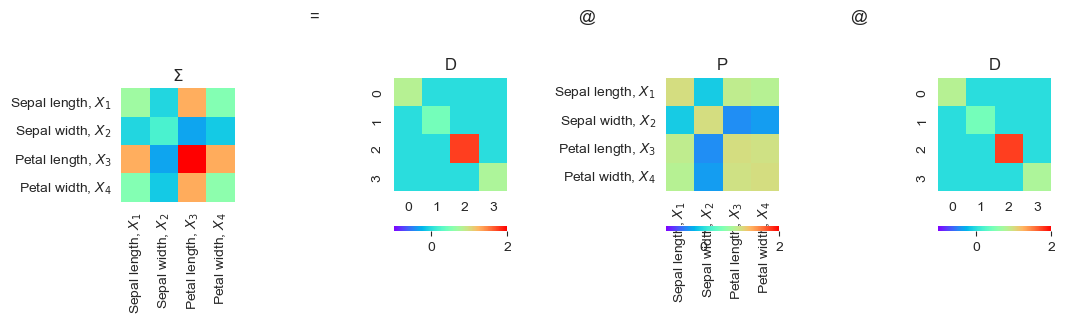

In [3]:
    # 逆矩阵
D = np.diag(np.sqrt(np.diag(SIGMA)))

fig, axs = plt.subplots(1, 7, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(SIGMA, cmap='rainbow',
                 vmin=-1, vmax=2,
                 cbar=False)
ax.set_aspect("equal")
plt.title('$\Sigma$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(D, cmap='rainbow',
                 vmin=-1, vmax=2,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('D')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(RHO, cmap='rainbow',
                 vmin=-1, vmax=2,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('P')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(D, cmap='rainbow',
                 vmin=-1, vmax=2,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('D')


Text(0.5, 1.0, '$V^T$')

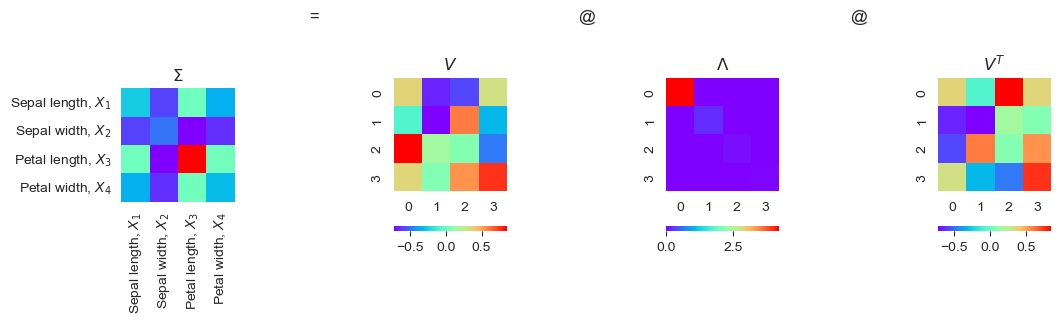

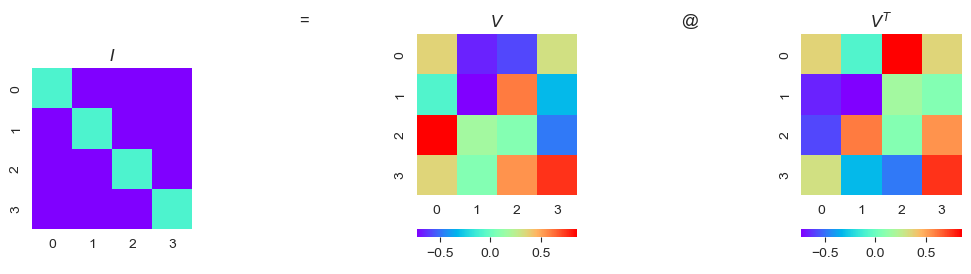

In [4]:
# 特征值分解
LAMBDA_, V = np.linalg.eig(SIGMA)

# 特征值矩阵
LAMBDA = np.diag(LAMBDA_)

fig, axs = plt.subplots(1, 7, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(SIGMA, cmap='rainbow', cbar=False)
ax.set_aspect("equal")
plt.title('$\Sigma$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(V, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(LAMBDA, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\Lambda$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(V.T, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V^T$')

fig, axs = plt.subplots(1, 5, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(V @ V.T, cmap='rainbow', cbar=False,
                 vmax=2.5, vmin=0)
ax.set_aspect("equal")
plt.title('$I$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(V, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(V.T, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V^T$')


              0             1             2             3
0  6.300080e+02 -2.628453e-13 -3.252953e-14  8.845702e-14
1 -2.628453e-13  3.615794e+01 -7.119305e-15  1.179612e-15
2 -3.252953e-14 -7.119305e-15  1.165322e+01  1.158795e-15
3  8.845702e-14  1.179612e-15  1.158795e-15  3.551429e+00


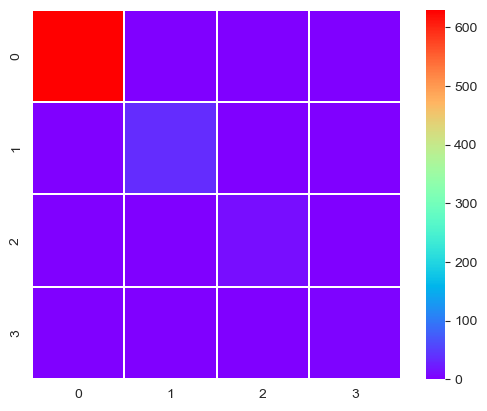

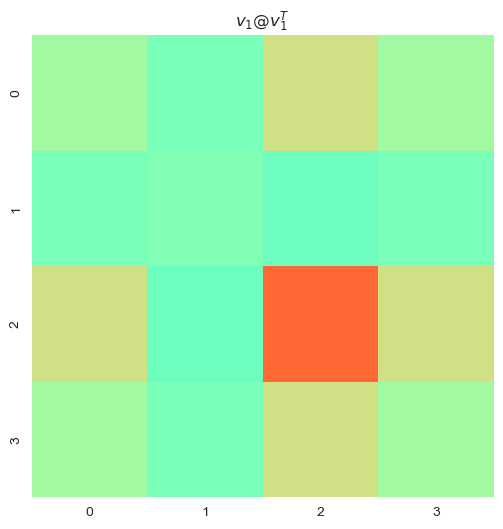

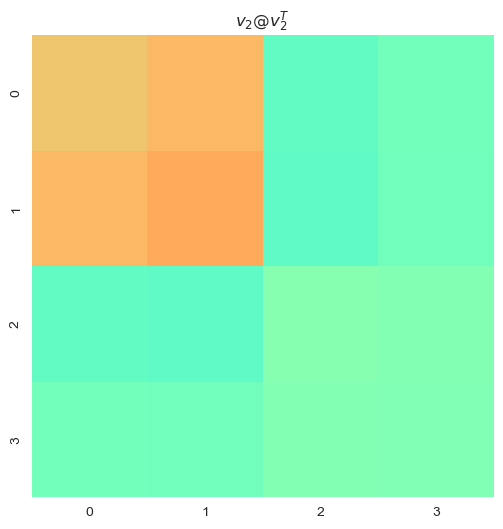

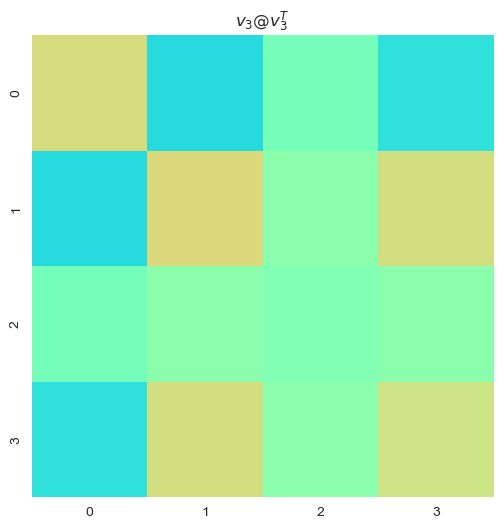

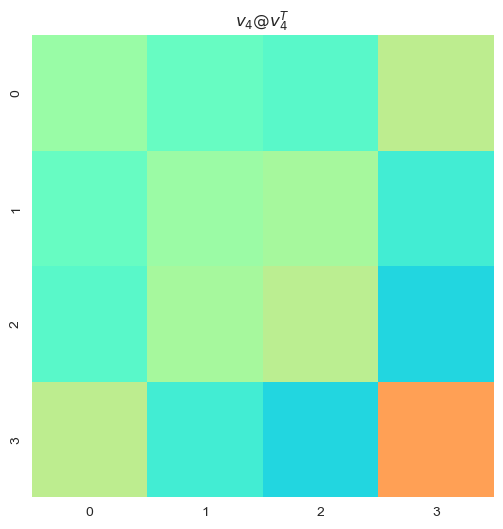

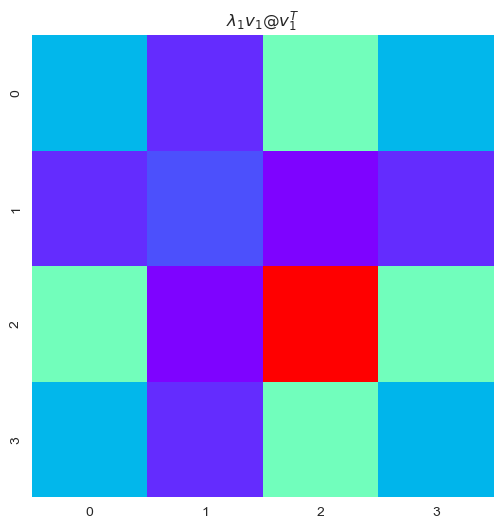

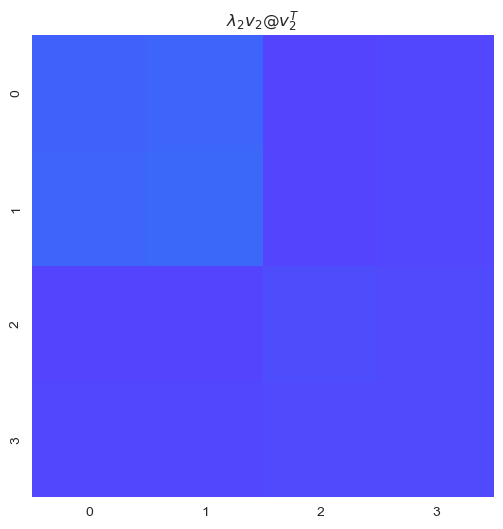

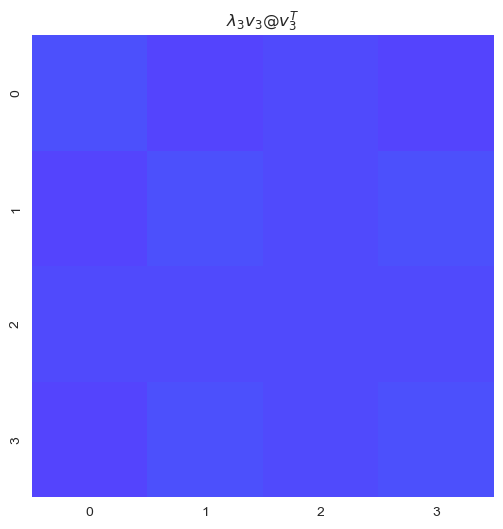

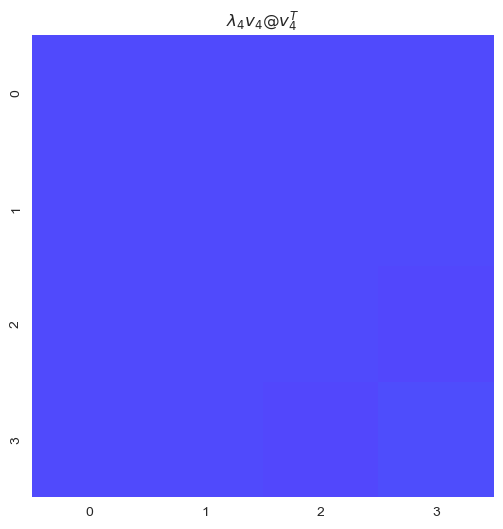

In [6]:
# 中心化数据
X_df_centered = X_df - X_df.mean()
# 投影
Yc = X_df_centered @ V

print(Yc.T @ Yc)
fig, axs = plt.subplots()

h = sns.heatmap(Yc.T @ Yc, cmap='rainbow', linewidths=.05)
h.set_aspect("equal")

for idx in range(4):
    v_j = V[:, idx].reshape(-1, 1)

    tensor_prod = v_j @ v_j.T

    fig, ax = plt.subplots(figsize=(6, 6))

    ax = sns.heatmap(tensor_prod, cmap='rainbow', cbar=False,
                     vmax=1, vmin=-1)
    ax.set_aspect("equal")
    plt.title('$v_' + str(idx + 1) + ' @ v_' + str(idx + 1) + '^T$')

SIGMA_reprod = np.zeros(4)

for idx in range(4):
    v_j = V[:, idx].reshape(-1, 1)
    lambda_j = LAMBDA_[idx]

    tensor_prod = lambda_j * v_j @ v_j.T

    SIGMA_reprod = SIGMA_reprod + tensor_prod

    fig, ax = plt.subplots(figsize=(6, 6))

    ax = sns.heatmap(tensor_prod, cmap='rainbow', cbar=False,
                     vmax=SIGMA.max().max(), vmin=SIGMA.min().min())
    ax.set_aspect("equal")
    plt.title('$\u03BB_' + str(idx + 1) + 'v_' + str(idx + 1) + ' @ v_' + str(idx + 1) + '^T$')


Text(0.5, 1.0, '$V^T$')

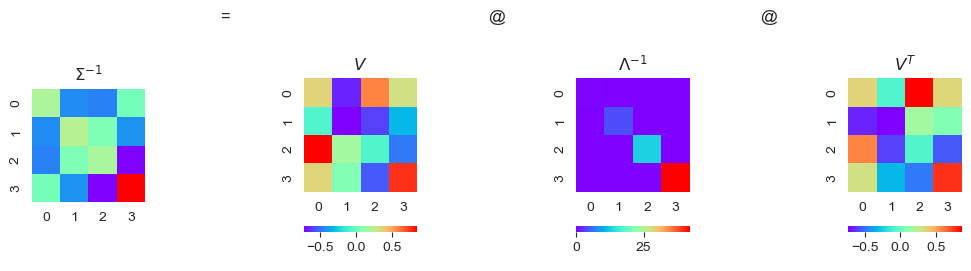

In [8]:
fig, axs = plt.subplots(1, 7, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(SIGMA_inv, cmap='rainbow', cbar=False)
ax.set_aspect("equal")
plt.title('$\Sigma^{-1}$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(V, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(np.linalg.inv(LAMBDA), cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\Lambda^{-1}$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(V.T, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V^T$')


Text(0.5, 1.0, '$V_Z^T$')

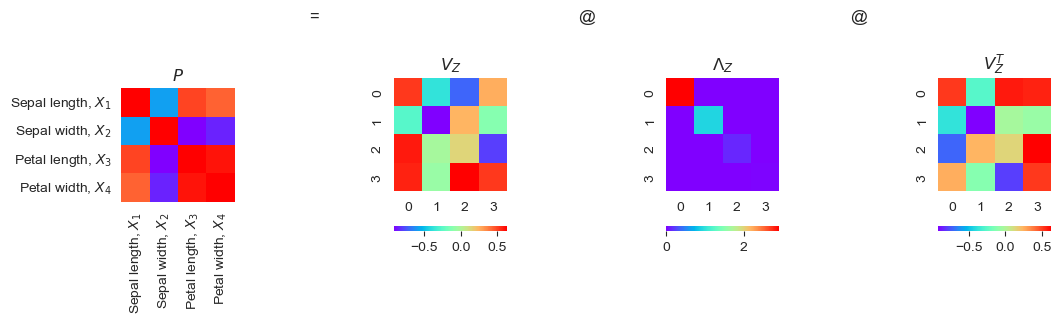

In [9]:
LAMBDA_P_, V_P = np.linalg.eig(RHO)

LAMBDA_P = np.diag(LAMBDA_P_)

fig, axs = plt.subplots(1, 7, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(RHO, cmap='rainbow', cbar=False)
ax.set_aspect("equal")
plt.title('$P$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(V_P, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V_Z$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(LAMBDA_P, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$\Lambda_Z$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(V_P.T, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V_Z^T$')


Text(0.5, 1.0, '$V^T$')

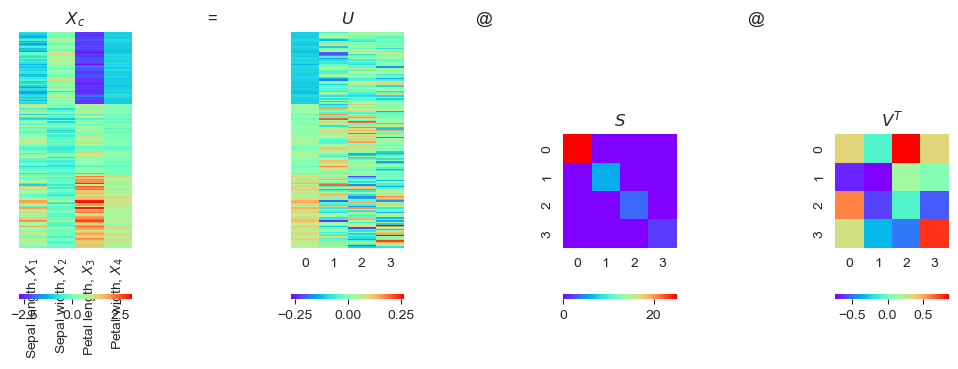

In [10]:
X_c_df = X_df - X_df.mean()

# 奇异值分解
U, S_, V = np.linalg.svd(X_c_df, full_matrices=False)
V = V.T
S = np.diag(S_)

fig, axs = plt.subplots(1, 7, figsize=(12, 4))

plt.sca(axs[0])
ax = sns.heatmap(X_c_df, cmap='rainbow', yticklabels=False,
                 cbar_kws={"orientation": "horizontal"})
plt.title('$X_c$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(U, cmap='rainbow', yticklabels=False,
                 cbar_kws={"orientation": "horizontal"})
plt.title('$U$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(S, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$S$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(V.T, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V^T$')


Text(0.5, 1.0, '$V$')

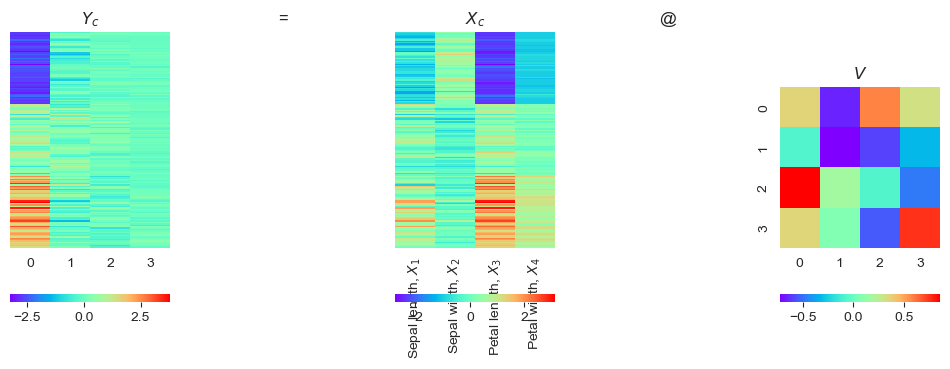

In [12]:
# 投影
Y_c_df = X_c_df @ V

fig, axs = plt.subplots(1, 5, figsize=(12, 4))

plt.sca(axs[0])
ax = sns.heatmap(Y_c_df, cmap='rainbow', yticklabels=False,
                 cbar_kws={"orientation": "horizontal"})
plt.title('$Y_c$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(X_c_df, cmap='rainbow', yticklabels=False,
                 cbar_kws={"orientation": "horizontal"})
plt.title('$X_c$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(V, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('$V$')


Text(0.5, 1.0, '$S$')

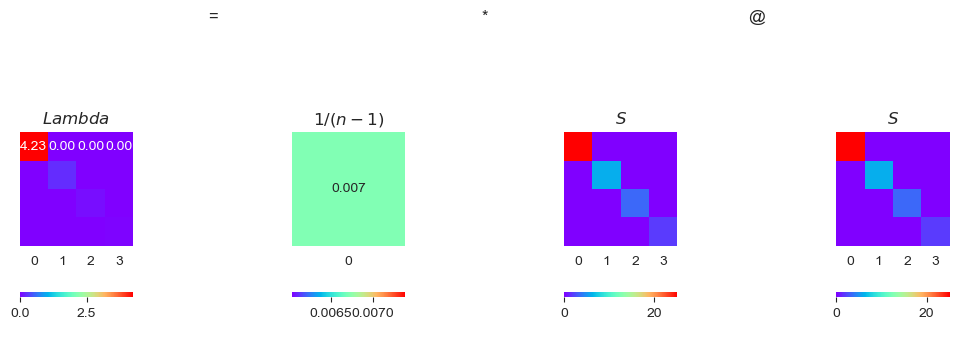

In [14]:
Lambda_reproduced = S ** 2 / (len(X_df) - 1)

Lambda_reproduced - LAMBDA  # for test only

fig, axs = plt.subplots(1, 7, figsize=(12, 4))

plt.sca(axs[0])
ax = sns.heatmap(LAMBDA, cmap='rainbow', yticklabels=False,
                 cbar_kws={"orientation": "horizontal"},
                 annot=True, fmt='.2f')
plt.title('$Lambda$')
ax.set_aspect("equal")

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(np.array([[1 / (len(X_df) - 1)]]),
                 cmap='rainbow', yticklabels=False,
                 cbar_kws={"orientation": "horizontal"},
                 annot=True, fmt='.3f')
plt.title('$1/(n-1)$')
ax.set_aspect("equal")

plt.sca(axs[3])
plt.title('*')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(S, cmap='rainbow', yticklabels=False,
                 cbar_kws={"orientation": "horizontal"},
                 annot=False, fmt='.2f')
plt.title('$S$')
ax.set_aspect("equal")

plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(S, cmap='rainbow', yticklabels=False,
                 cbar_kws={"orientation": "horizontal"},
                 annot=False, fmt='.2f')
ax.set_aspect("equal")
plt.title('$S$')


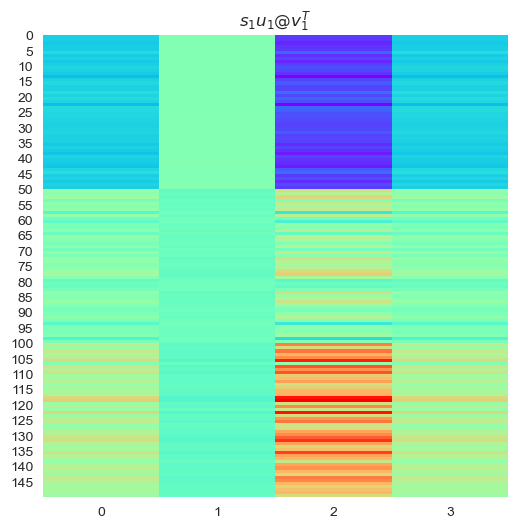

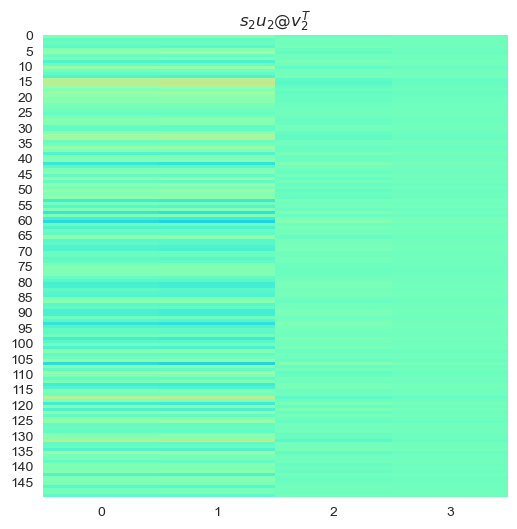

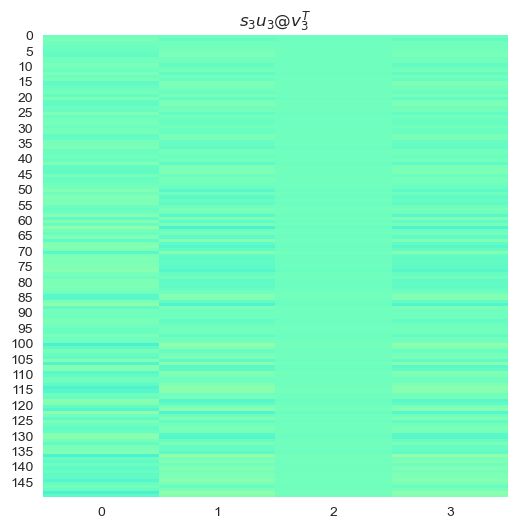

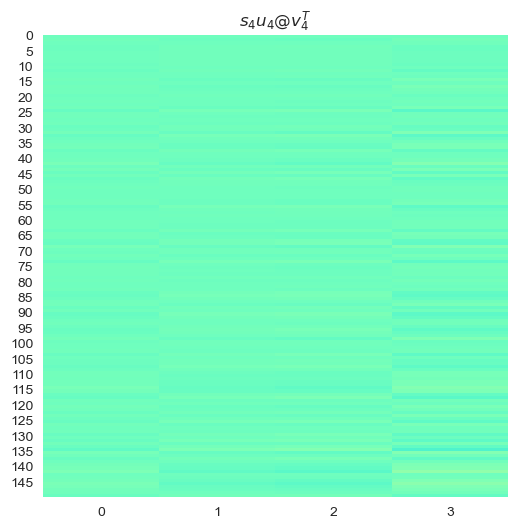

In [15]:
Xc_reprod = np.zeros((150, 4))

for idx in range(4):
    v_j = V[:, idx].reshape(-1, 1)
    u_j = U[:, idx].reshape(-1, 1)

    s_j = S_[idx]

    tensor_prod = s_j * u_j @ v_j.T

    Xc_reprod = Xc_reprod + tensor_prod

    fig, ax = plt.subplots(figsize=(6, 6))

    ax = sns.heatmap(tensor_prod, cmap='rainbow', cbar=False,
                     vmax=X_c_df.max().max(), vmin=X_c_df.min().min())
    # ax.set_aspect("equal")
    plt.title('$s_' + str(idx + 1) + 'u_' + str(idx + 1) + ' @ v_' + str(idx + 1) + '^T$')


Text(0.5, 1.0, '(x - $\\mu$)')

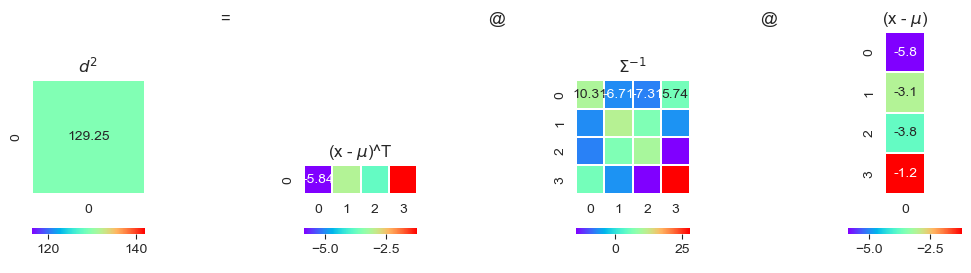

In [16]:
MU = X_df.mean()
MU = np.array([MU]).T

x = np.zeros_like(MU)

# 马氏距离
d2 = (x - MU).T @ SIGMA_inv @ (x - MU)

fig, axs = plt.subplots(1, 7, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(np.matrix(d2), cmap='rainbow', linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.2f')
ax.set_aspect("equal")
plt.title('$d^2$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap((x - MU).T, cmap='rainbow', linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.2f')
ax.set_aspect("equal")
plt.title('(x - $\mu$)^T')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(SIGMA_inv, cmap='rainbow', linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"}, fmt='.2f')
ax.set_aspect("equal")
plt.title('$\Sigma^{-1}$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap((x - MU), cmap='rainbow', linewidths=.05, annot=True,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('(x - $\mu$)')


Text(0.5, 1.0, 'R')

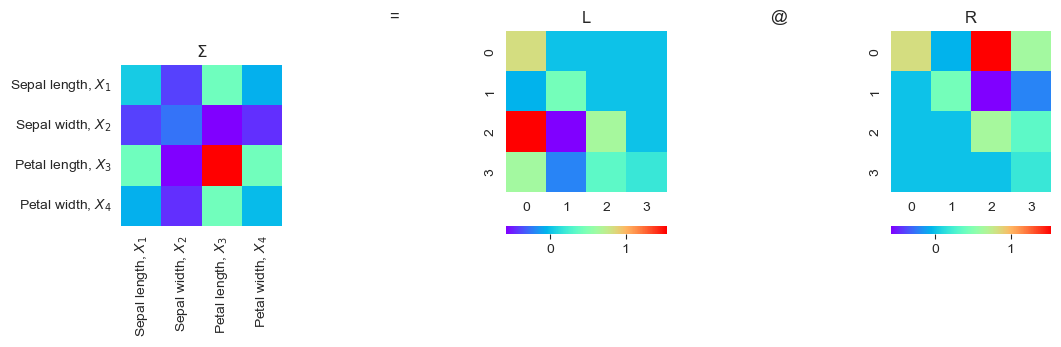

In [17]:
import scipy.linalg

# Cholesky 分解
L = scipy.linalg.cholesky(SIGMA, lower=True)
R = scipy.linalg.cholesky(SIGMA, lower=False)

fig, axs = plt.subplots(1, 5, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(SIGMA, cmap='rainbow', cbar=False)
ax.set_aspect("equal")
plt.title('$\Sigma$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(L, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('L')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(R, cmap='rainbow',
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('R')

